In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from reorder import reorder_coords

In [16]:
# Read in 3D data
file_path = 'data/3D/wing_init/output/wing_000_slices.dat'  # Replace with your file path
with open(file_path, 'r') as f:
    s = f.readlines()

# Read in 3D data
start = []
nzones=0

nnods = []
nelms = []
zcoords = []

for i, line in enumerate(s):
    if line.strip().startswith('DATAPACKING=POINT'):
        start.append(i+1)
        nnod = int(s[i-1].split('=')[1].split()[0])
        nelm = int(s[i-1].split('=')[2].split()[0])
        nnods.append(nnod)
        nelms.append(nelm)
        nzones += 1

        # Get zcoordinates
        z = float(s[i-2].split('=')[-1].split()[0][:-1])
        zcoords.append(z)

    else:
        continue

data = []
for i, (ind, nnod, nelm) in enumerate(zip(start,nnods, nelms)):
    slice_dat = np.genfromtxt(s[ind:ind+nnod], dtype=float)
    connectivity  = np.genfromtxt(s[ind+nnod:ind+nnod+nelm], dtype=float)
    df_tmp = pd.DataFrame(slice_dat[:,[0,1,2,6,7,8,9]], columns=['CoordinateX', 'CoordinateY', 'CoordinateZ', 'VX', 'VY', 'VZ', 'CP'])

    df_conn = pd.DataFrame(connectivity, columns=['NodeC1', 'NodeC2'])

    df_slice = pd.Series(i*np.ones(slice_dat.shape[0], dtype='int'), name='Slice_ID')
    
    result = pd.concat([df_tmp, df_conn, df_slice], axis=1)
    df_tmp = result.reindex(df_tmp.index)

    index_list = list(reorder_coords(df_tmp, return_indices=True))
    df_tmp = df_tmp.loc[index_list]

    data.append(df_tmp.values[:,[0,1,2,3,4,5,6]])

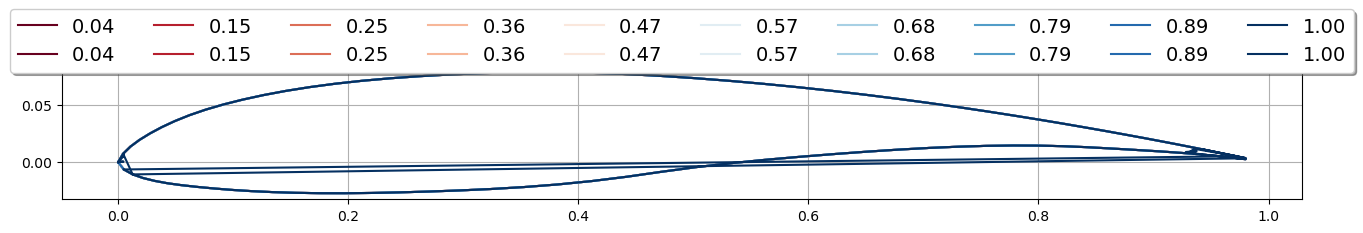

In [22]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

for color, dat, z in zip(colors, data, zcoords):
    x = dat[:,0]
    y = dat[:,1]
    
    ax.plot(x,y, color=color, label=f'{z/max(zcoords):.2f}')
    ax.plot([x[-1], x[0]], [y[-1], y[0]], color=color, label=f'{z/max(zcoords):.2f}')

ax.grid()
ax.set_aspect('equal')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
              ncol=min(len(data), len(data)), fancybox=True, shadow=True, fontsize=14)

plt.show()

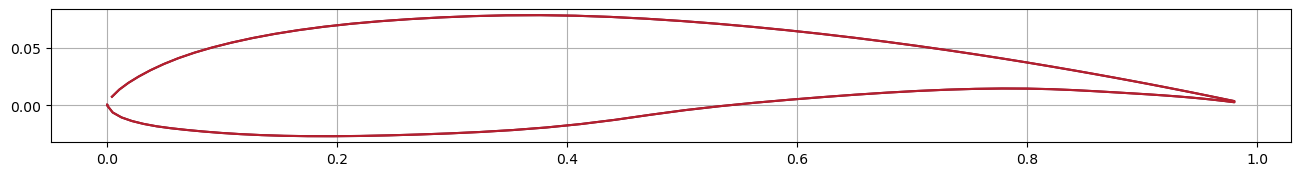

In [18]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(data))]

dat1 = data[0]
dat2 = data[1]

ax.plot(dat1[:,0],dat1[:,1], color=colors[0])
ax.plot(dat2[:,0],dat2[:,1], color=colors[1])

ax.grid()
ax.set_aspect('equal')

plt.show()

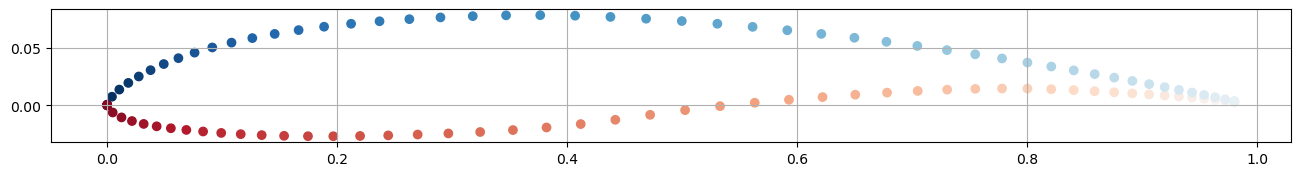

In [33]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot()

dat = data[0]
x = dat[:,0]
y = dat[:,1]

# Calculate the color for each dataset
cmap = plt.get_cmap('RdBu')
colors = [cmap(i) for i in np.linspace(0, 1, len(x))]

ax.scatter(x, y, color=colors)
#ax.plot([x[-1], x[0]], [y[-1], y[0]], color=colors)

ax.grid()
ax.set_aspect('equal')

plt.show()

In [31]:
colors[0]

(0.403921568627451, 0.0, 0.12156862745098039, 1.0)